#Clustering
จุดประสงค์
---
จัดกลุ่มของข้อมูลเพื่อ
-  วิเคราะห์จำนวนกลุ่มของไวน์
-  สรุปข้อมูลจากกลุ่มของไวน์เพื่อนำไปใช้ประโยชน์ในการจัดจำแนกประเภทกลุ่มลูกค้า

#Design

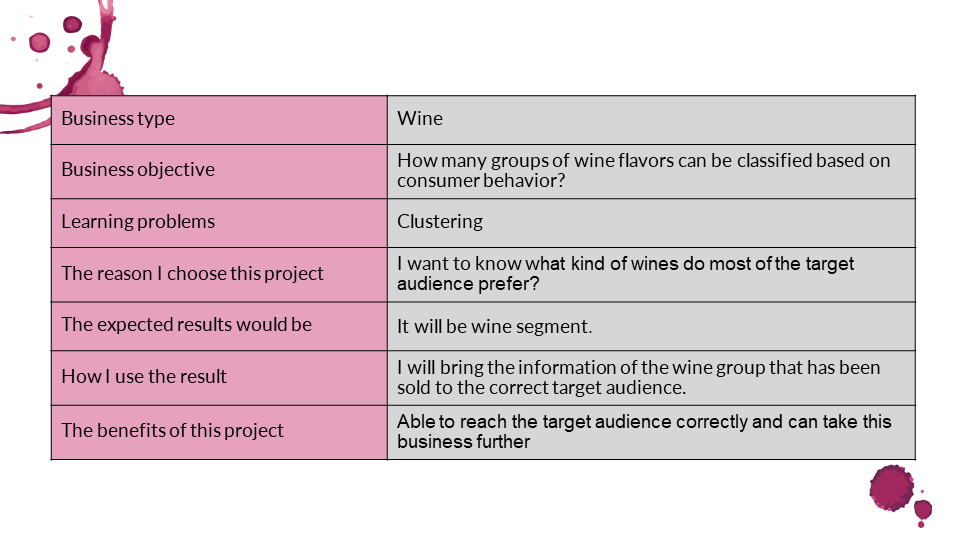

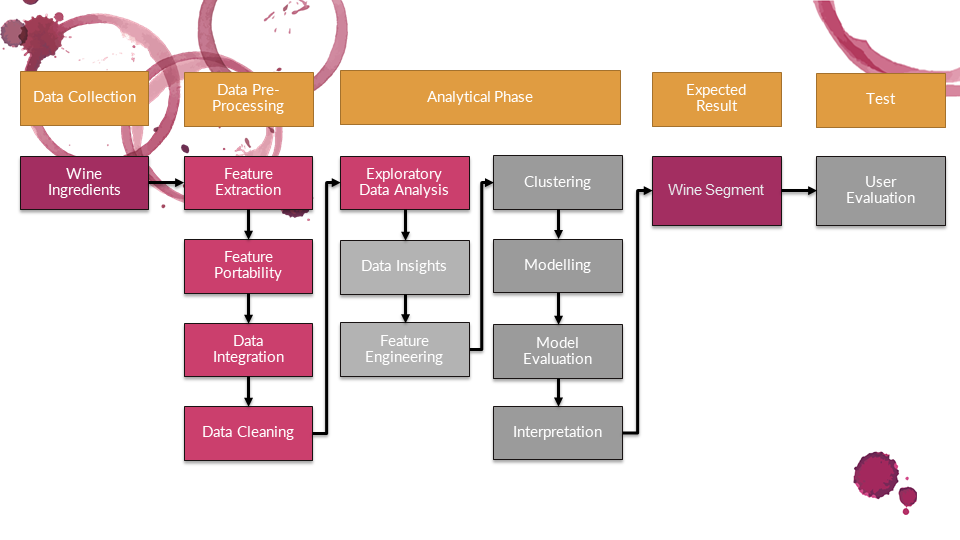

In [1]:
#Install UMAP
!pip3 install umap-learn
!pip3 install umap-learn[plot]

     |████████████████████████████████| 86 kB 6.5 MB/s 
     |████████████████████████████████| 1.1 MB 43.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=40c17f732ff403cc16300bb579c9edee86a54d97bfbca1acb38ce732bdaba72b
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=0e19786ac121ab7a216c01bfcf670e3a0493199a99b561d935b351cc8d3846c5
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent
     |████████████████████████████████| 15.8 MB 34.4 MB/s 
     |████████████████████████████████| 76 kB 5.4 MB/s 
     |████████████████████████████████| 802 kB 61.9 MB/s 
     |████████████████████████████████| 132 kB 58.2 MB/s 
     |████████████████████████████████| 793 kB 44.0 MB/s 
     |█████████████████

In [2]:
# Data Manipulation, Linear Algebra
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)
import plotly.express as px

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import silhouette_score
import umap
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.cluster import KMeans

In [3]:
url = '/content/drive/MyDrive/Colab Notebooks/wine-clustering.csv'
wp = pd.read_csv(url)
wp.reset_index().head()
#wp.head()

index  Alcohol  Malic_Acid   Ash  ...  Color_Intensity   Hue  OD280  Proline
0      0    14.23        1.71  2.43  ...             5.64  1.04   3.92     1065
1      1    13.20        1.78  2.14  ...             4.38  1.05   3.40     1050
2      2    13.16        2.36  2.67  ...             5.68  1.03   3.17     1185
3      3    14.37        1.95  2.50  ...             7.80  0.86   3.45     1480
4      4    13.24        2.59  2.87  ...             4.32  1.04   2.93      735

[5 rows x 14 columns]

#Preprocessing

In [4]:
wp.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [5]:
# check null
wp.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
wp.describe()

Alcohol  Malic_Acid         Ash  ...         Hue       OD280      Proline
count  178.000000  178.000000  178.000000  ...  178.000000  178.000000   178.000000
mean    13.000618    2.336348    2.366517  ...    0.957449    2.611685   746.893258
std      0.811827    1.117146    0.274344  ...    0.228572    0.709990   314.907474
min     11.030000    0.740000    1.360000  ...    0.480000    1.270000   278.000000
25%     12.362500    1.602500    2.210000  ...    0.782500    1.937500   500.500000
50%     13.050000    1.865000    2.360000  ...    0.965000    2.780000   673.500000
75%     13.677500    3.082500    2.557500  ...    1.120000    3.170000   985.000000
max     14.830000    5.800000    3.230000  ...    1.710000    4.000000  1680.000000

[8 rows x 13 columns]

#EDA and Statistical Analysis

In [7]:
wp.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

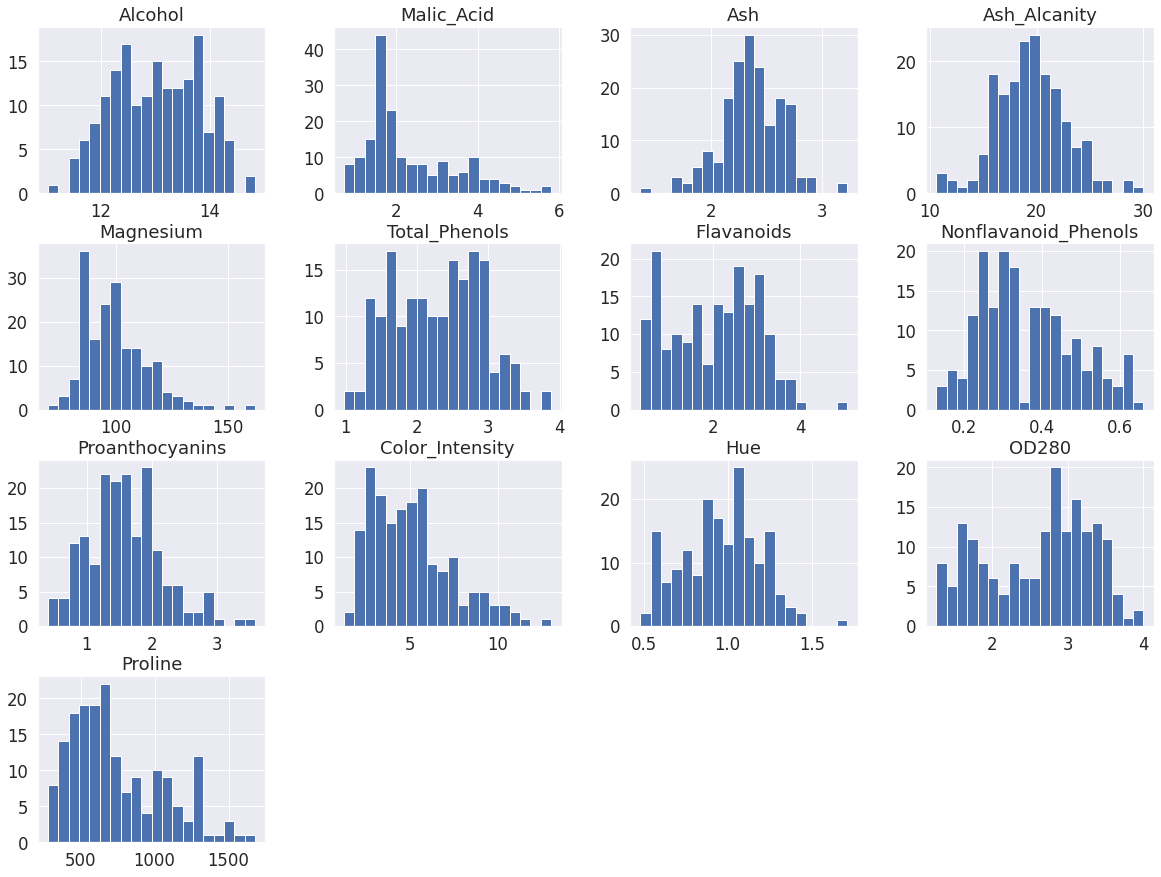

In [8]:
# check data stats
plt.rcParams["figure.figsize"] = (20, 15)
wp.hist(bins=20)
plt.show()

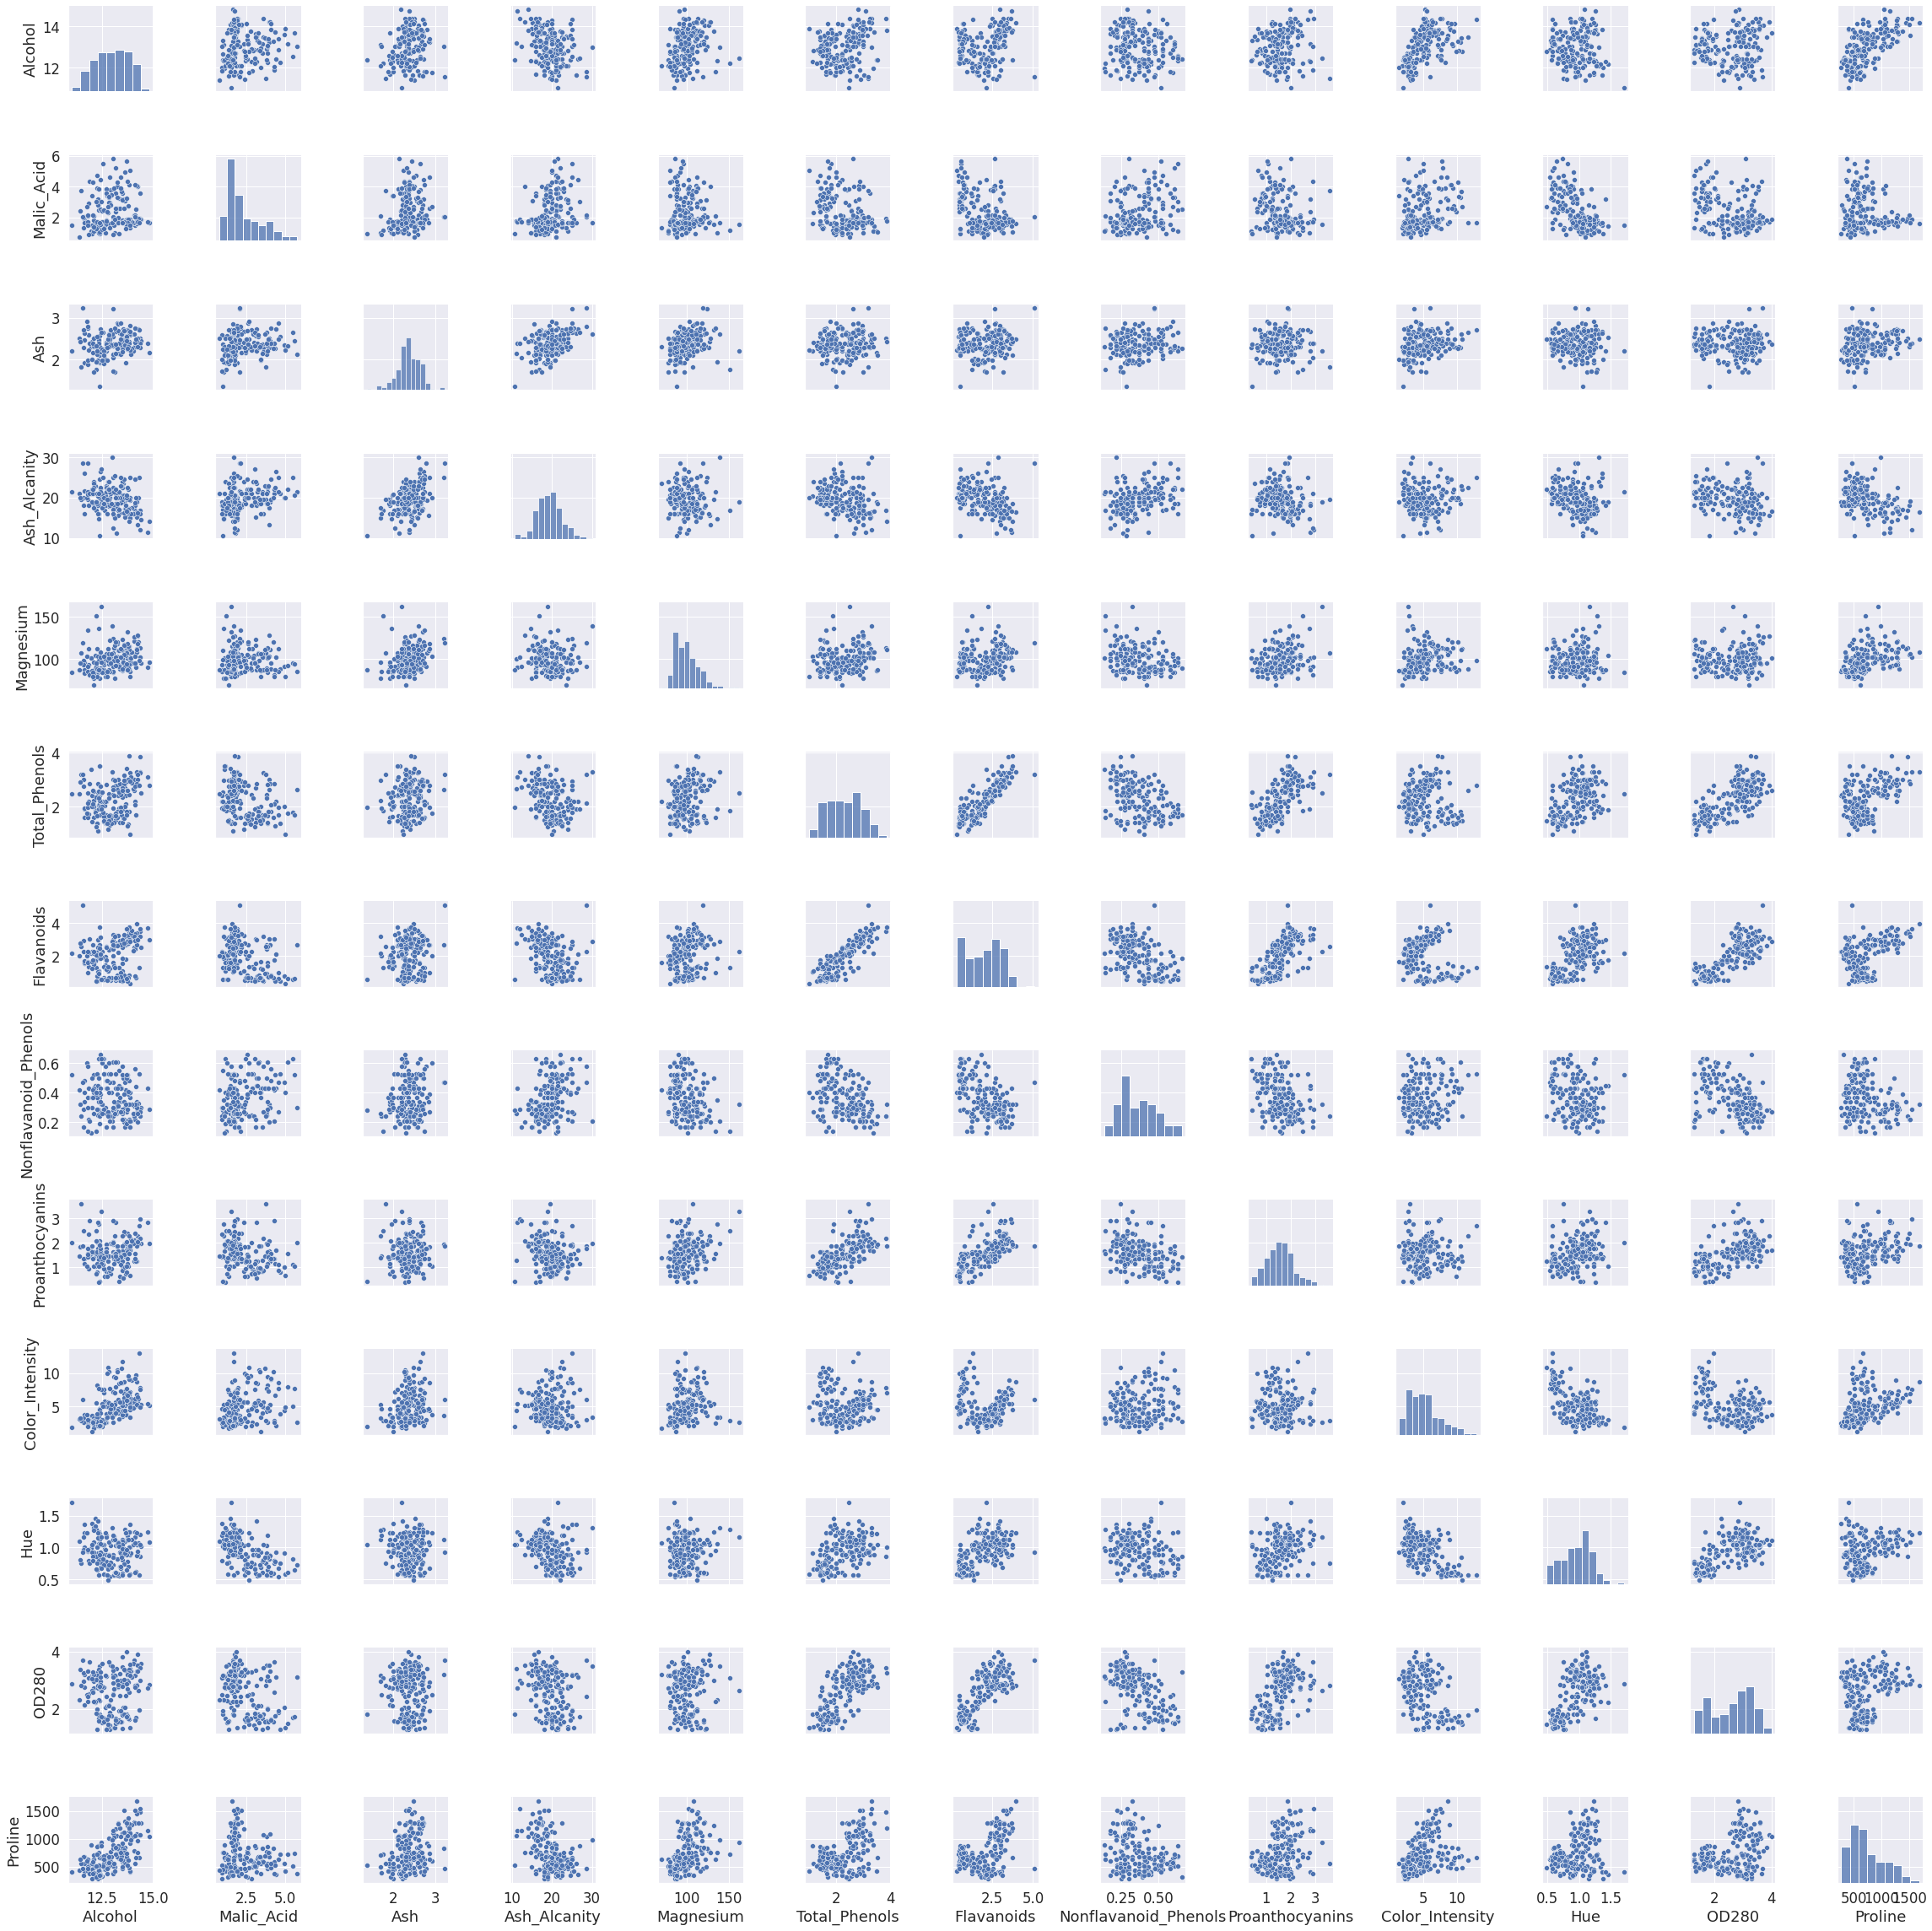

In [9]:
#compare each data
sns.pairplot(wp)
plt.show()

#Feature Engineering
จะทำให้ข้อมูลของ data เป็น normalized เพื่อที่ให้ง่ายต่อการวิเคราะห์ข้อมูลโดยเริ่มจาก scaled ข้อมูลและใช้
- **Box-Cox** จะทำงานได้กับเฉพาะ data ที่มีข้อมูลเป็นค่าบวกเท่านั้น
- **Yeo-Johnson** จะทำงานกับ data ที่มีข้อมูลที่เป็นทั้งค่าบวกและค่าลบ

เพื่อทำให้ข้อมูลเป็น normalized

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



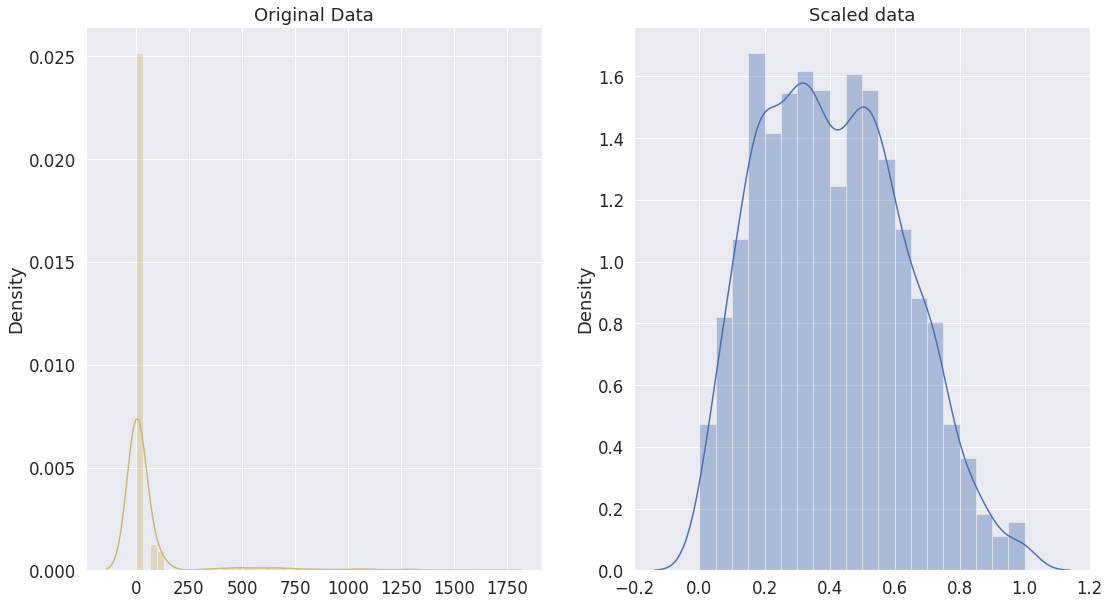

In [10]:
# mix-max scale the data between 0 and 1
scaleddf = minmax_scale(wp)

# plot both together to compare
fig, ax=plt.subplots(1,2)
fig.set_size_inches(18,10)
sns.distplot(wp, ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(scaleddf, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



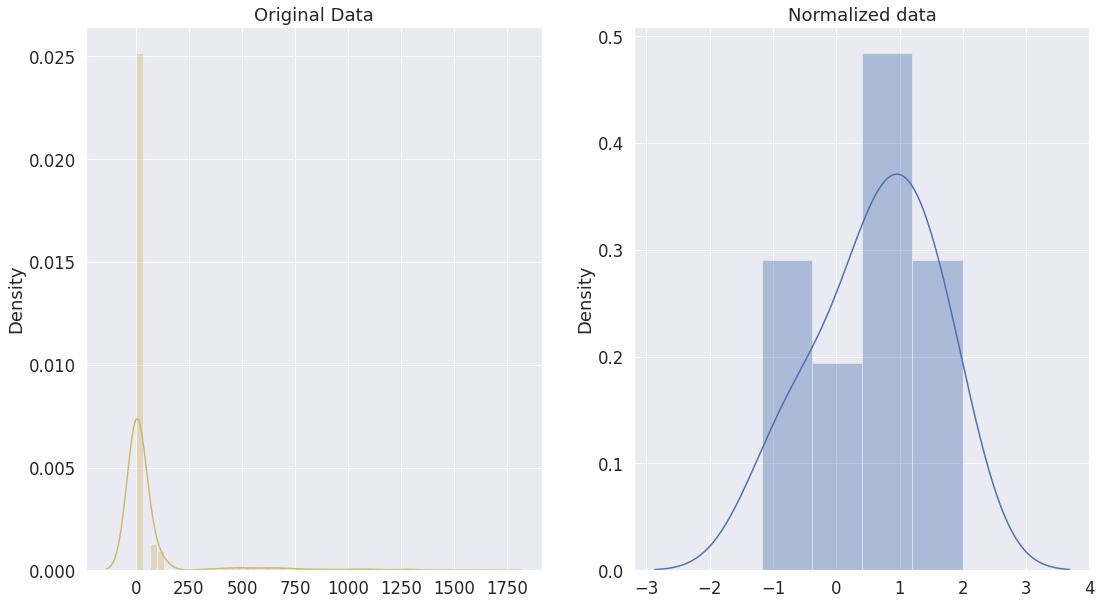

In [11]:
# for Box-Cox Transformation
boxcox = PowerTransformer(method='box-cox')
# normalize the exponential data with boxcox
boxcoxdf = boxcox.fit_transform(wp)

#plot both together to compare
fig, ax=plt.subplots(1,2)
fig.set_size_inches(18,10)
sns.distplot(wp, ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(boxcoxdf[0], ax=ax[1])
ax[1].set_title("Normalized data")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



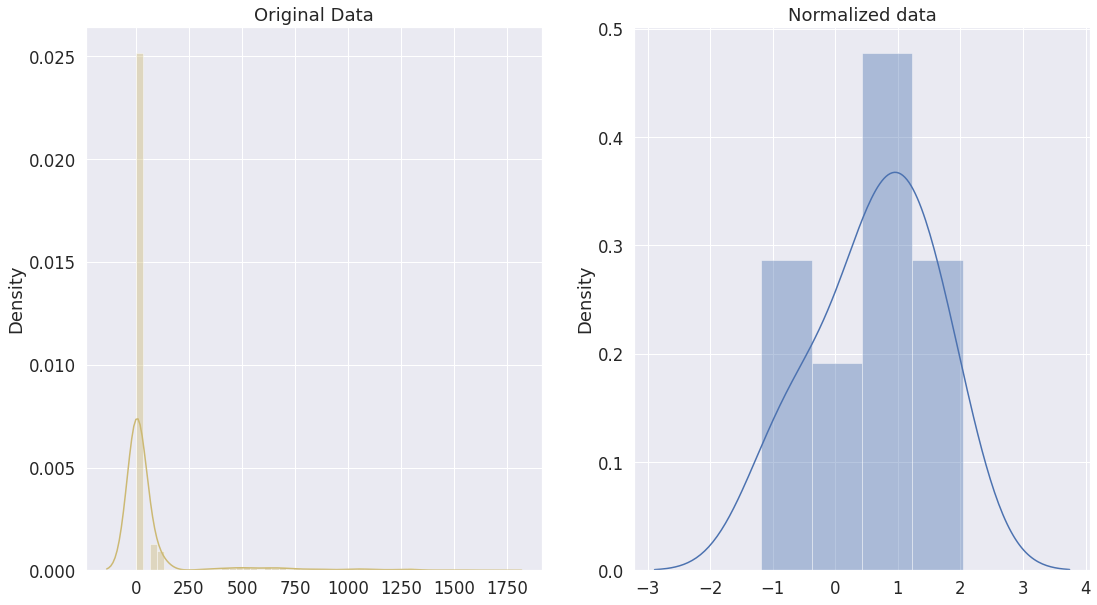

In [12]:
# for Yeo-Johnson Transformation
yeo = PowerTransformer(method='yeo-johnson')
# normalize the exponential data with yeo-johnson
yeodf = yeo.fit_transform(wp)

# plot both together to compare
fig, ax=plt.subplots(1,2)
fig.set_size_inches(18,10)
sns.distplot(wp, ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(yeodf[0], ax=ax[1])
ax[1].set_title("Normalized data")
plt.show()

#KMeans Model

##Params
ตั้งตัวแปรในการอ้างอิงและใช้ซ้ำ

In [13]:
SEED = 4
COLUMNS=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins']

##Modelling
เราจะทำการแยกข้อมูลเป็นกลุ่ม custer k เพื่อใช้ในการจัดจำแนกกลุ่มเป้าหมายที่ต้องการโดยใช้ทั้ง **Box-Cox** และ **Yeo-Johnson**

###Box-Cox Elbow & Silhouette Score



In [14]:
wssbc = []
silbc = []
# For possible 'k' values 2-10
k = range(2, 11)
for n in k:
    # initialize clustering model
    algorithm = (KMeans(n_clusters = n,random_state=SEED) )
    algorithm.fit(boxcoxdf)
    labels = algorithm.labels_
    wp[f'box_k_{n}']=labels
    # store Weight of sum of squared distance & silhouette score
    wssbc.append(algorithm.inertia_)
    silbc.append(silhouette_score(boxcoxdf, labels, metric = 'euclidean'))

###Yeo-Johnson Elbow & Silhouette Score

In [15]:
wssyeo = []
silyeo = []
for n in k:
    # initialize clustering model
    algorithm = (KMeans(n_clusters = n,random_state=SEED) )
    algorithm.fit(yeodf)
    labels = algorithm.labels_
    wp[f'yeo_k_{n}']=labels
    # store Weight of sum of squared distance
    wssyeo.append(algorithm.inertia_)
    silyeo.append(silhouette_score(yeodf, labels, metric = 'euclidean'))

##DataFrame
สร้างไว้เพื่อง่ายต่อการค้นหาและนำมาใช้เช็คข้อมูล

In [16]:
wp

Alcohol  Malic_Acid   Ash  ...  yeo_k_8  yeo_k_9  yeo_k_10
0      14.23        1.71  2.43  ...        6        8         5
1      13.20        1.78  2.14  ...        6        3         1
2      13.16        2.36  2.67  ...        2        1         5
3      14.37        1.95  2.50  ...        6        8         5
4      13.24        2.59  2.87  ...        2        1         5
..       ...         ...   ...  ...      ...      ...       ...
173    13.71        5.65  2.45  ...        7        7         2
174    13.40        3.91  2.48  ...        7        7         7
175    13.27        4.28  2.26  ...        7        7         7
176    13.17        2.59  2.37  ...        7        7         7
177    14.13        4.10  2.74  ...        7        7         7

[178 rows x 31 columns]

In [17]:
wp.groupby('box_k_2')[COLUMNS].mean()

Alcohol  Malic_Acid  ...  Nonflavanoid_Phenols  Proanthocyanins
box_k_2                         ...                                       
0        12.752667    2.730444  ...              0.434111         1.244111
1        13.254205    1.933295  ...              0.287955         1.945568

[2 rows x 9 columns]

#Evaluate Elbow & Siloulette Score

เราจะใช้ตัว **Elbow** และ **Siloulette Score** ใช้และเปรียบเทียบในการหาข้อมูลดังนี้
- จุดตัดของกลุ่ม custer
- คะแนนในแต่ละช่วงของกลุ่ม custer
- กลุ่ม custer ที่เหมาะจะนำมา **Interpretation** และ **Visualizing Clusters**

##Box-Cox

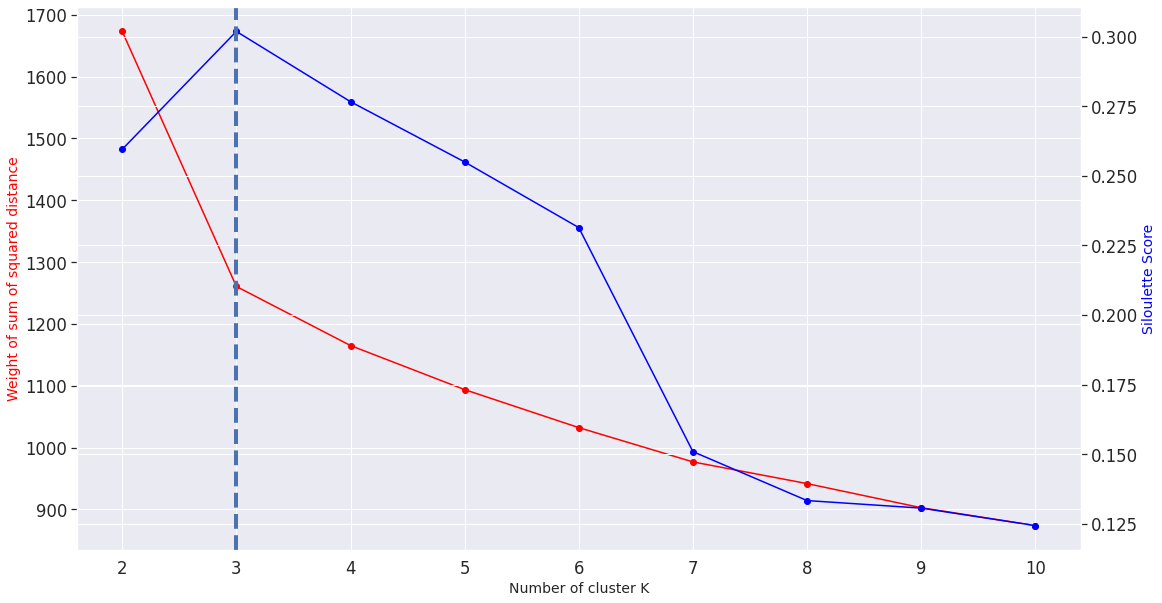

In [18]:
fig,ax = plt.subplots()
fig.set_size_inches(18,10)
ax.plot(k, wssbc, color="red", marker="o")
ax.set_xlabel("Number of cluster K",fontsize=14)
ax.set_ylabel("Weight of sum of squared distance",color="red",fontsize=14)

ax2=ax.twinx()
ax2.plot(k, silbc,color="blue",marker="o")
ax2.set_ylabel("Siloulette Score",color="blue",fontsize=14)

plt.axvline(3, lw=4, linestyle='--')
plt.show()

##Yeo-Johnson



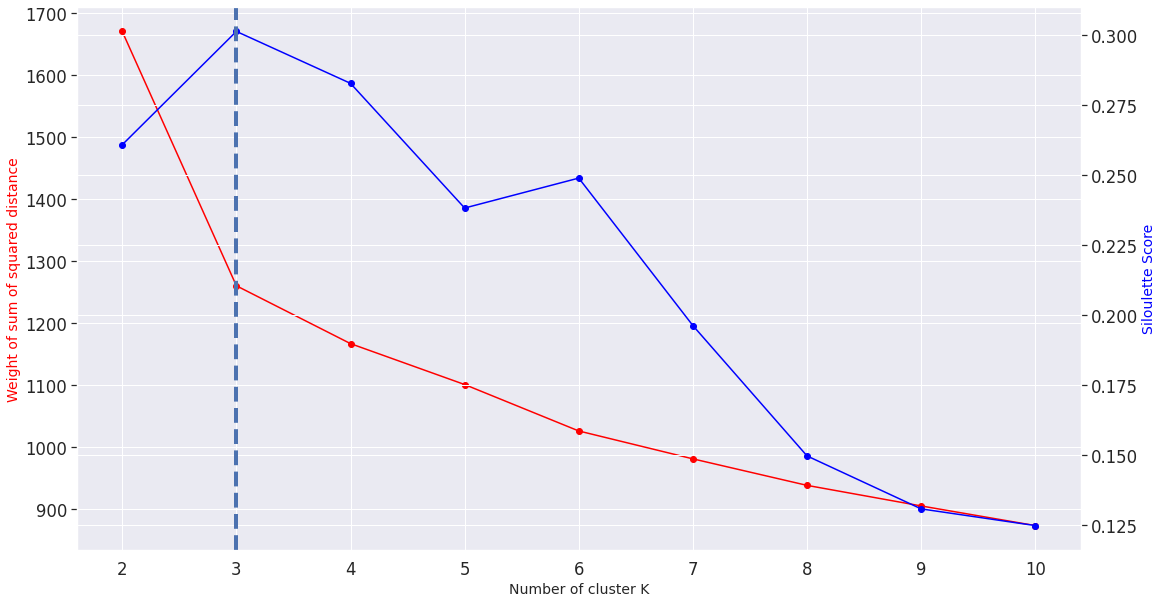

In [19]:
fig,ax = plt.subplots()
fig.set_size_inches(18,10)
ax.plot(k, wssyeo, color="red", marker="o")
ax.set_xlabel("Number of cluster K",fontsize=14)
ax.set_ylabel("Weight of sum of squared distance",color="red",fontsize=14)

ax2=ax.twinx()
ax2.plot(k, silyeo,color="blue",marker="o")
ax2.set_ylabel("Siloulette Score",color="blue",fontsize=14)

plt.axvline(3, lw=4, linestyle='--')
plt.show()

#Interpretation
- จะทำการนำข้อมูล custer k ที่เราเลือกจากช่วง evaluate มา plot โดยใช้ตัว **Violin Plot** ในการแยกข้อมูลของกลุ่ม custer เพื่อให้เห็นความแตกต่างของข้อมูลในแต่ละกลุ่ม custer ที่มีผลต่อข้อมูล

In [20]:
#Color Mapping
def color_change_2d(data,col,k):
  if k==5:
    map = {0:'blue',1:'orange',2:'green',3:'red',4:'purple'}
  elif k==4:
    map = {0:'blue',1:'orange',2:'green',3:'red'}
  elif k==3:
    map = {0:'blue',1:'orange',2:'green'}
  return data[col].map(map)

##Box-Cox

###K=5

In [21]:
model = KMeans(n_clusters=5,random_state=SEED)
model.fit(boxcoxdf)
model.cluster_centers_.round(4)

array([[-1.0668, -0.0413, -0.099 ,  0.7206, -0.8591, -0.0695,  0.1793,
         0.3991,  0.1413, -1.1858,  0.2447,  0.4624, -1.0321],
       [-0.8074, -1.0618, -0.7584, -0.3202, -0.0672,  0.3933,  0.3748,
        -0.9762,  0.6368, -0.6473,  0.742 ,  0.3648, -0.4475],
       [-0.5558, -0.8102, -0.9174, -0.6535, -0.1517, -0.82  , -0.7308,
         0.5257, -1.2516, -0.6753,  0.2782, -0.8814, -0.5427],
       [ 0.2067,  0.9675,  0.2617,  0.6368,  0.0024, -1.0087, -1.2839,
         0.7016, -0.7633,  0.9717, -1.2138, -1.2618, -0.2417],
       [ 0.9193, -0.1574,  0.3524, -0.6725,  0.5834,  0.8939,  0.947 ,
        -0.5632,  0.5814,  0.3511,  0.4749,  0.7961,  1.118 ]])

In [22]:
wp.groupby('box_k_5')[COLUMNS].mean()


Alcohol  Malic_Acid  ...  Nonflavanoid_Phenols  Proanthocyanins
box_k_5                         ...                                       
0        12.134167    2.274722  ...              0.405833         1.646667
1        12.346364    1.435455  ...              0.248636         1.966818
2        12.552857    1.593571  ...              0.429286         0.941429
3        13.171489    3.431702  ...              0.452766         1.165957
4        13.743390    2.013559  ...              0.288814         1.909322

[5 rows x 9 columns]

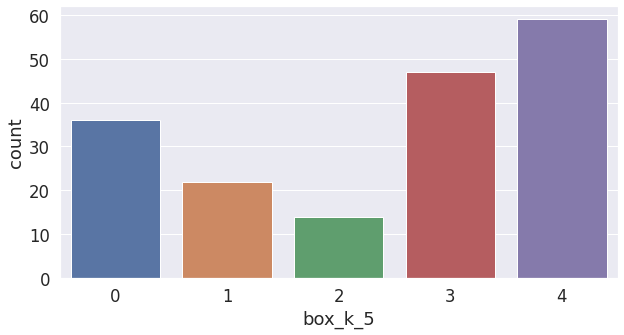

In [23]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='box_k_5', data=wp);

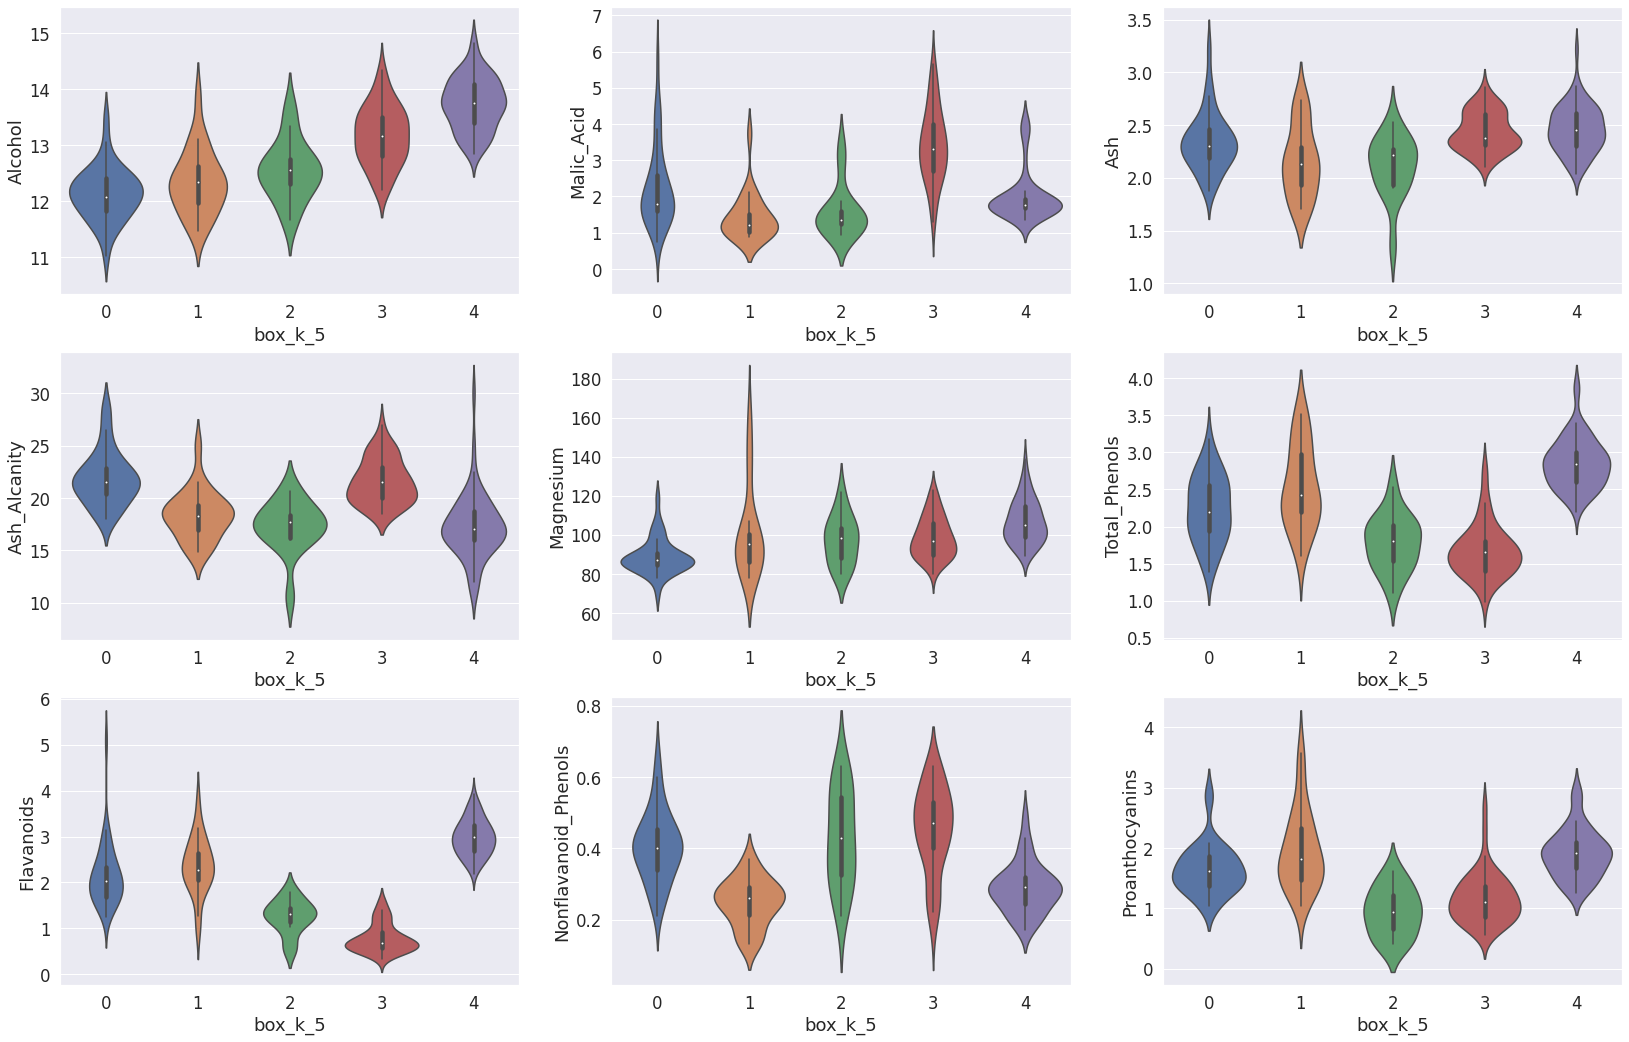

In [24]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(28,18))
ax = ax.ravel()
for pos, col in enumerate(COLUMNS):
  # use violinplot to see each cluster's variable is distrubuted
  sns.violinplot(x='box_k_5', y=col, data=wp, ax=ax[pos])

In [25]:
features = wp[COLUMNS]
umap_2d = umap.UMAP(n_components=2, init='random', random_state=SEED)
proj_2d = umap_2d.fit_transform(features)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



In [26]:
fig = go.Figure(data=go.Scatter(x=proj_2d[:,0], y=proj_2d[:,1],
                 mode="markers",
                 marker=dict(color=color_change_2d(wp,'box_k_5',5),size=5,showscale=False)))
fig.update_layout(height=500, title_text="Visualizing 2D Clusters K=5", showlegend=False)
fig.show()

###K=4

In [27]:
model = KMeans(n_clusters=4,random_state=SEED)
model.fit(boxcoxdf)
model.cluster_centers_.round(4)

array([[ 0.8929, -0.1665,  0.3361, -0.6634,  0.6199,  0.8851,  0.9362,
        -0.5575,  0.6142,  0.3249,  0.4818,  0.7824,  1.1121],
       [ 0.1403,  0.8229,  0.1617,  0.5263, -0.0145, -1.0127, -1.2481,
         0.6816, -0.7905,  0.8605, -1.1547, -1.266 , -0.2613],
       [-0.7594, -1.153 , -1.0808, -0.6053, -0.1532,  0.1335,  0.0759,
        -0.7008, -0.0344, -0.6679,  0.7359,  0.0855, -0.4627],
       [-1.0216, -0.097 , -0.0379,  0.6723, -0.7953, -0.0922,  0.1665,
         0.3787,  0.1247, -1.1597,  0.3107,  0.4085, -1.0139]])

In [28]:
wp.groupby('box_k_4')[COLUMNS].mean()

Alcohol  Malic_Acid  ...  Nonflavanoid_Phenols  Proanthocyanins
box_k_4                         ...                                       
0        13.722167    2.005333  ...              0.289333         1.932167
1        13.117885    3.274615  ...              0.450385         1.151923
2        12.386000    1.386000  ...              0.282400         1.604400
3        12.170732    2.210244  ...              0.404146         1.640000

[4 rows x 9 columns]

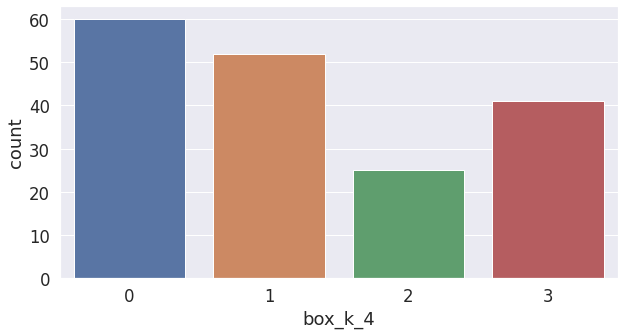

In [29]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='box_k_4', data=wp);

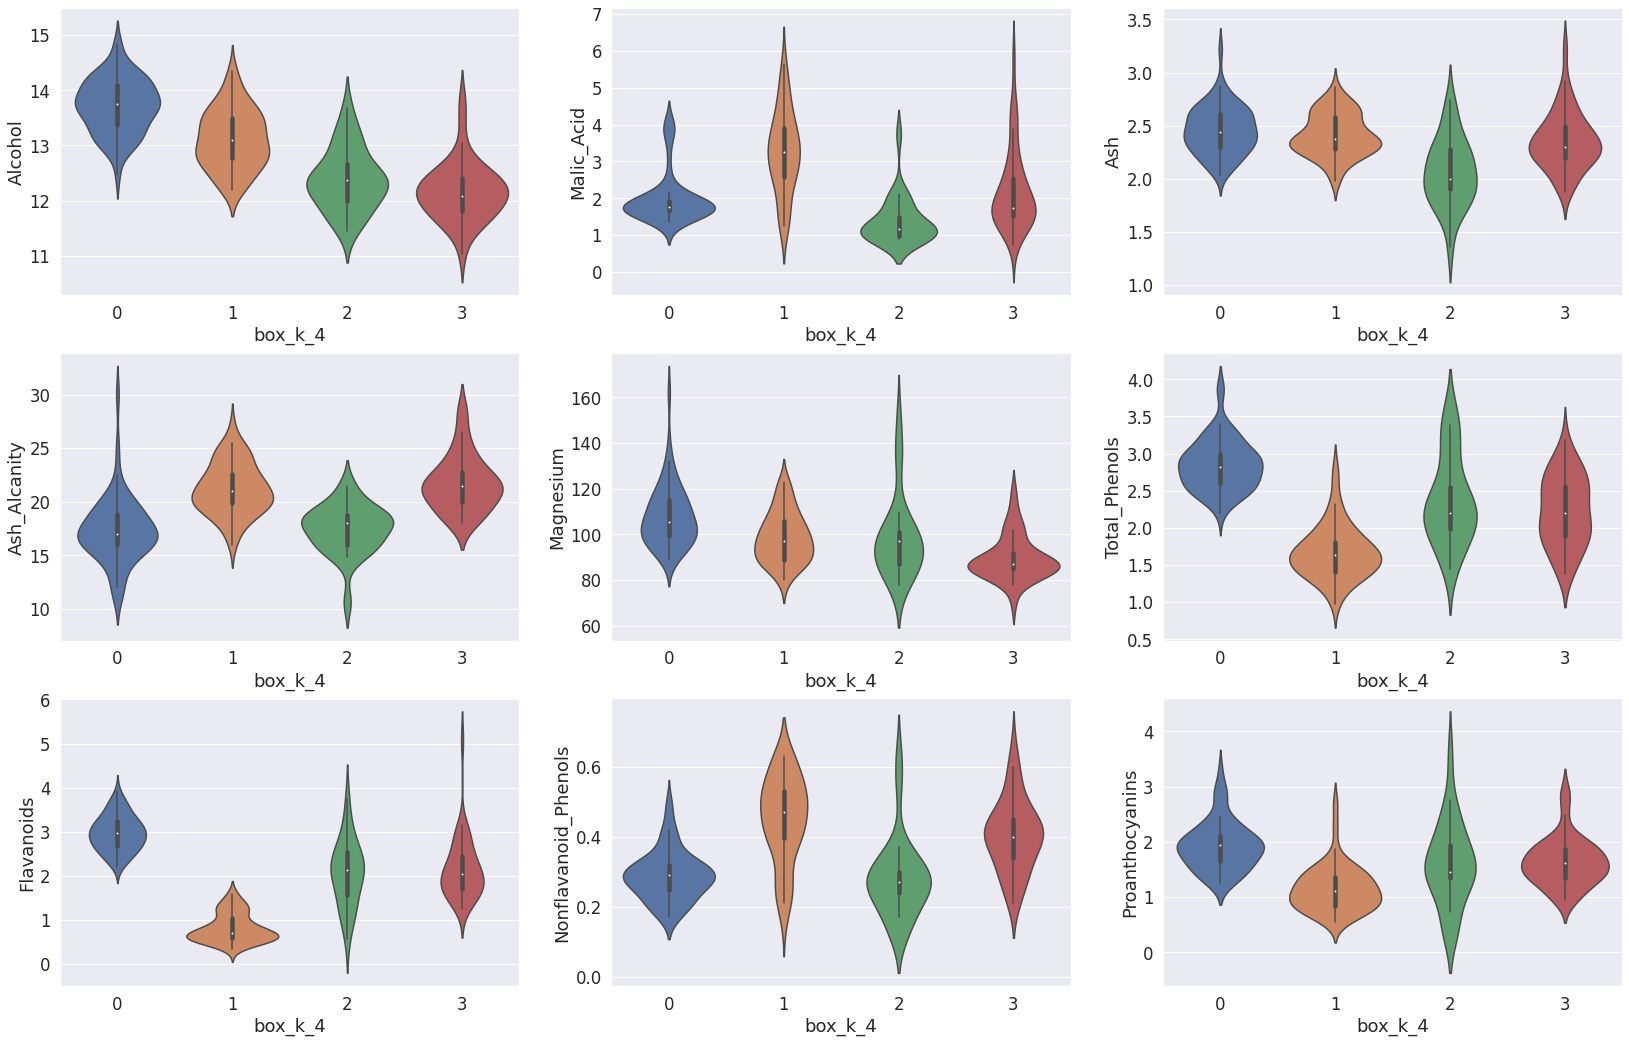

In [30]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(28,18))
ax = ax.ravel()
for pos, col in enumerate(COLUMNS):
  # use violinplot to see each cluster's variable is distrubuted
  sns.violinplot(x='box_k_4', y=col, data=wp, ax=ax[pos])

In [31]:
features = wp[COLUMNS]
umap_2d = umap.UMAP(n_components=2, init='random', random_state=SEED)
proj_2d = umap_2d.fit_transform(features)

In [32]:
fig = go.Figure(data=go.Scatter(x=proj_2d[:,0], y=proj_2d[:,1],
                 mode="markers",
                 marker=dict(color=color_change_2d(wp,'box_k_4',4),size=5,showscale=False)))
fig.update_layout(height=500, title_text="Visualizing 2D Clusters K=4", showlegend=False)
fig.show()

###K=3

In [33]:
model = KMeans(n_clusters=3,random_state=SEED)
model.fit(boxcoxdf)
model.cluster_centers_.round(4)

array([[-0.9248, -0.501 , -0.484 ,  0.1732, -0.5907, -0.0317,  0.0848,
        -0.0362,  0.0629, -1.0056,  0.4729,  0.269 , -0.8307],
       [ 0.837 , -0.173 ,  0.364 , -0.6202,  0.622 ,  0.8821,  0.9592,
        -0.5344,  0.5981,  0.3163,  0.4803,  0.7841,  1.0766],
       [ 0.1403,  0.8229,  0.1617,  0.5263, -0.0145, -1.0127, -1.2481,
         0.6816, -0.7905,  0.8605, -1.1547, -1.266 , -0.2613]])

In [34]:
wp.groupby('box_k_3')[COLUMNS].mean()

Alcohol  Malic_Acid  ...  Nonflavanoid_Phenols  Proanthocyanins
box_k_3                         ...                                       
0        12.250312    1.901875  ...              0.357500         1.626719
1        13.676774    1.997903  ...              0.292097         1.922097
2        13.117885    3.274615  ...              0.450385         1.151923

[3 rows x 9 columns]

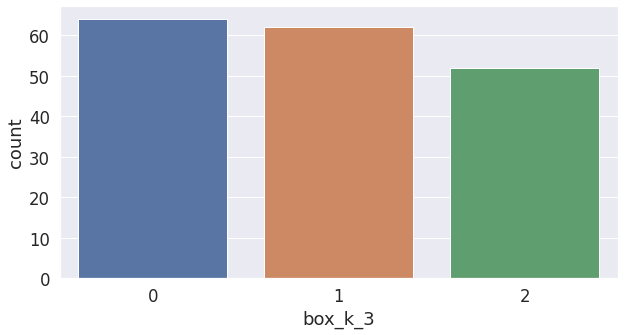

In [35]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='box_k_3', data=wp);

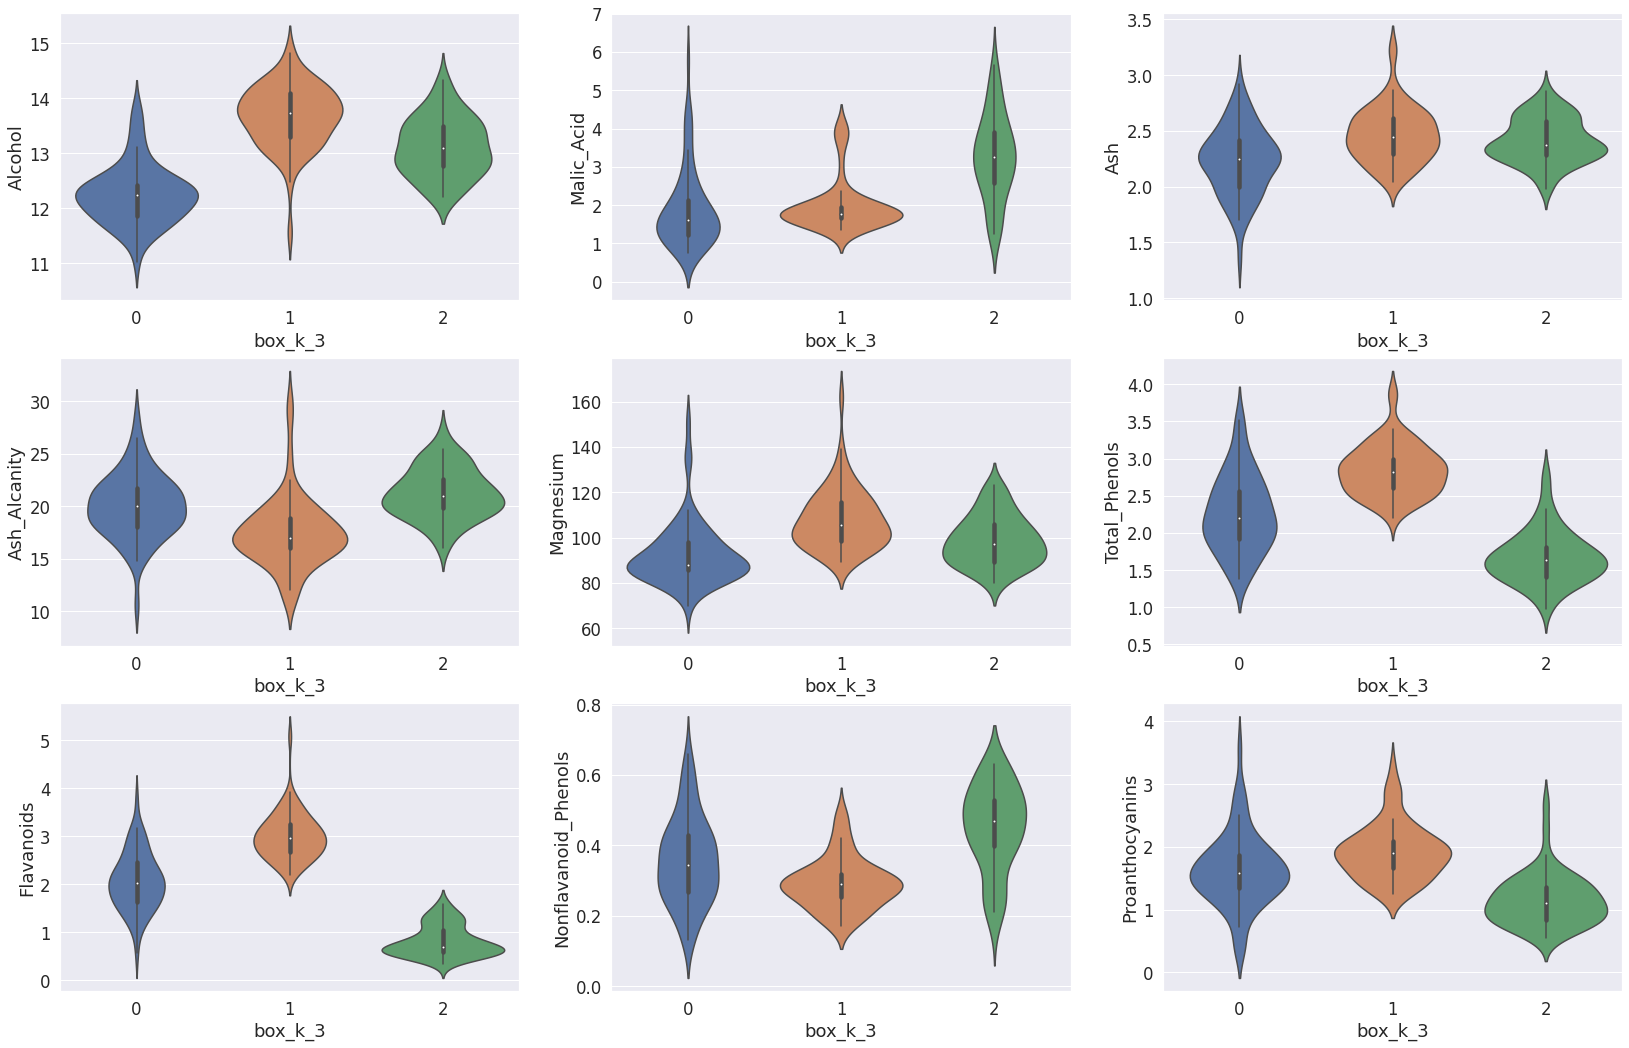

In [36]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(28,18))
ax = ax.ravel()
for pos, col in enumerate(COLUMNS):
  # use violinplot to see each cluster's variable is distrubuted
  sns.violinplot(x='box_k_3', y=col, data=wp, ax=ax[pos])

In [37]:
features = wp[COLUMNS]
umap_2d = umap.UMAP(n_components=2, init='random', random_state=SEED)
proj_2d = umap_2d.fit_transform(features)

In [38]:
fig = go.Figure(data=go.Scatter(x=proj_2d[:,0], y=proj_2d[:,1],
                 mode="markers",
                 marker=dict(color=color_change_2d(wp,'box_k_3',3),size=5,showscale=False)))
fig.update_layout(height=500, title_text="Visualizing 2D Clusters K=3", showlegend=False)
fig.show()

##Yeo-Johnson

###K=5

In [39]:
model = KMeans(n_clusters=5,random_state=SEED)
model.fit(yeodf)
model.cluster_centers_.round(4)

array([[ 0.1984,  0.9335,  0.2526,  0.6148,  0.033 , -1.0124, -1.2566,
         0.6651, -0.7772,  0.9475, -1.2026, -1.2654, -0.2406],
       [ 0.9783, -0.2421,  0.2363, -0.8203,  0.5226,  0.8961,  0.9765,
        -0.6016,  0.5717,  0.3973,  0.481 ,  0.7755,  1.1831],
       [-0.9391, -0.3728, -0.1549,  0.1409, -0.6204, -0.8283, -0.5298,
         1.0084, -0.6908, -0.8172,  0.4269, -0.4564, -0.6413],
       [-0.8552, -0.9121, -1.0568, -0.098 , -0.7624,  0.0637,  0.128 ,
        -0.3795,  0.05  , -1.012 ,  0.5266,  0.406 , -0.9465],
       [-0.7367,  0.3321,  0.6625,  0.7676,  0.3812,  0.653 ,  0.612 ,
        -0.2906,  0.8561, -0.7895,  0.23  ,  0.6384, -0.4057]])

In [40]:
wp.groupby('yeo_k_5')[COLUMNS].mean()

Alcohol  Malic_Acid  ...  Nonflavanoid_Phenols  Proanthocyanins
yeo_k_5                         ...                                       
0        13.165000    3.388333  ...              0.447708         1.161250
1        13.790545    1.931091  ...              0.285091         1.903273
2        12.239500    1.926000  ...              0.490000         1.205500
3        12.307647    1.507647  ...              0.310882         1.607059
4        12.402857    2.725714  ...              0.327143         2.095714

[5 rows x 9 columns]

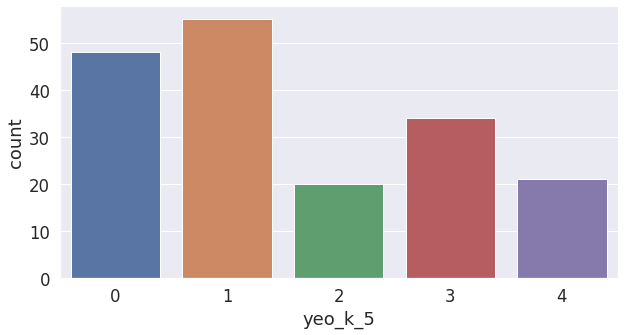

In [41]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='yeo_k_5', data=wp);

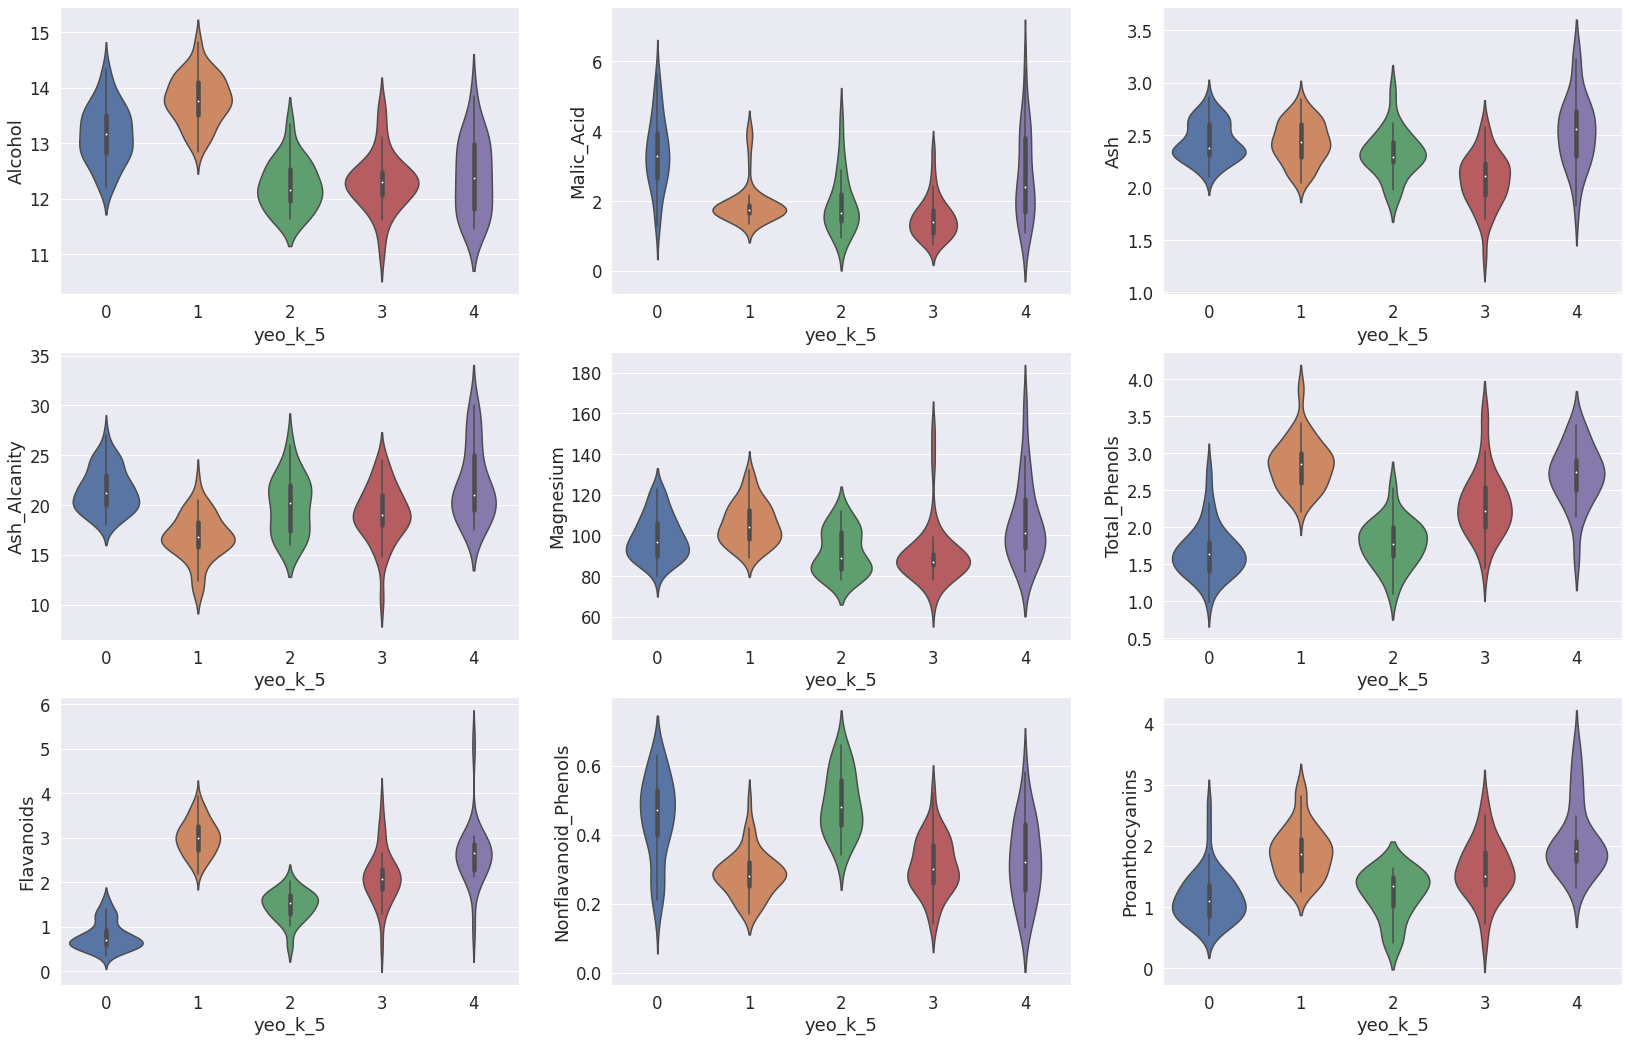

In [42]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(28,18))
ax = ax.ravel()
for pos, col in enumerate(COLUMNS):
  # use violinplot to see each cluster's variable is distrubuted
  sns.violinplot(x='yeo_k_5', y=col, data=wp, ax=ax[pos])

In [43]:
features = wp[COLUMNS]
umap_2d = umap.UMAP(n_components=2, init='random', random_state=SEED)
proj_2d = umap_2d.fit_transform(features)

In [44]:
fig = go.Figure(data=go.Scatter(x=proj_2d[:,0], y=proj_2d[:,1],
                 mode="markers",
                 marker=dict(color=color_change_2d(wp,'yeo_k_5',5),size=5,showscale=False)))
fig.update_layout(height=500,title_text="Visualizing 2D Clusters K=5", showlegend=False)
fig.show()

###K=4

In [45]:
model = KMeans(n_clusters=4,random_state=SEED)
model.fit(yeodf)
model.cluster_centers_.round(4)

array([[-0.4904, -1.2292, -1.4297, -0.8462, -0.0282, -0.4146, -0.2873,
        -0.2794, -0.5754, -0.6086,  0.7106, -0.287 , -0.354 ],
       [ 0.1796,  0.9327,  0.2138,  0.5776, -0.0576, -0.9965, -1.2617,
         0.7267, -0.7775,  0.9276, -1.202 , -1.2498, -0.2648],
       [ 0.8309, -0.2213,  0.3053, -0.6389,  0.5904,  0.9148,  0.9422,
        -0.6009,  0.611 ,  0.3018,  0.4722,  0.7719,  1.0853],
       [-1.0508, -0.2012, -0.0749,  0.5416, -0.6791, -0.0087,  0.1749,
         0.1363,  0.2158, -1.0859,  0.3435,  0.3785, -0.9784]])

In [46]:
wp.groupby('yeo_k_4')[COLUMNS].mean()

Alcohol  Malic_Acid  ...  Nonflavanoid_Phenols  Proanthocyanins
yeo_k_4                         ...                                       
0        12.606667    1.277778  ...              0.328333         1.307778
1        13.149796    3.386939  ...              0.455306         1.160816
2        13.671935    1.975484  ...              0.285968         1.927903
3        12.146735    2.131224  ...              0.376735         1.698571

[4 rows x 9 columns]

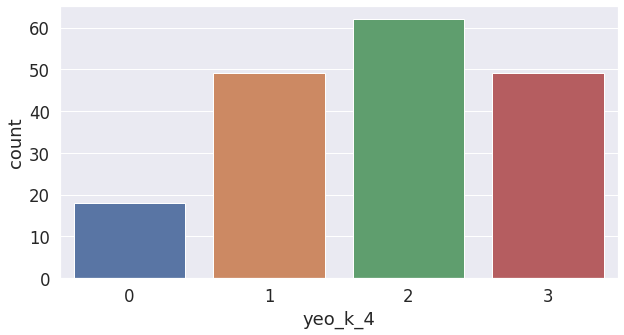

In [47]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='yeo_k_4', data=wp);

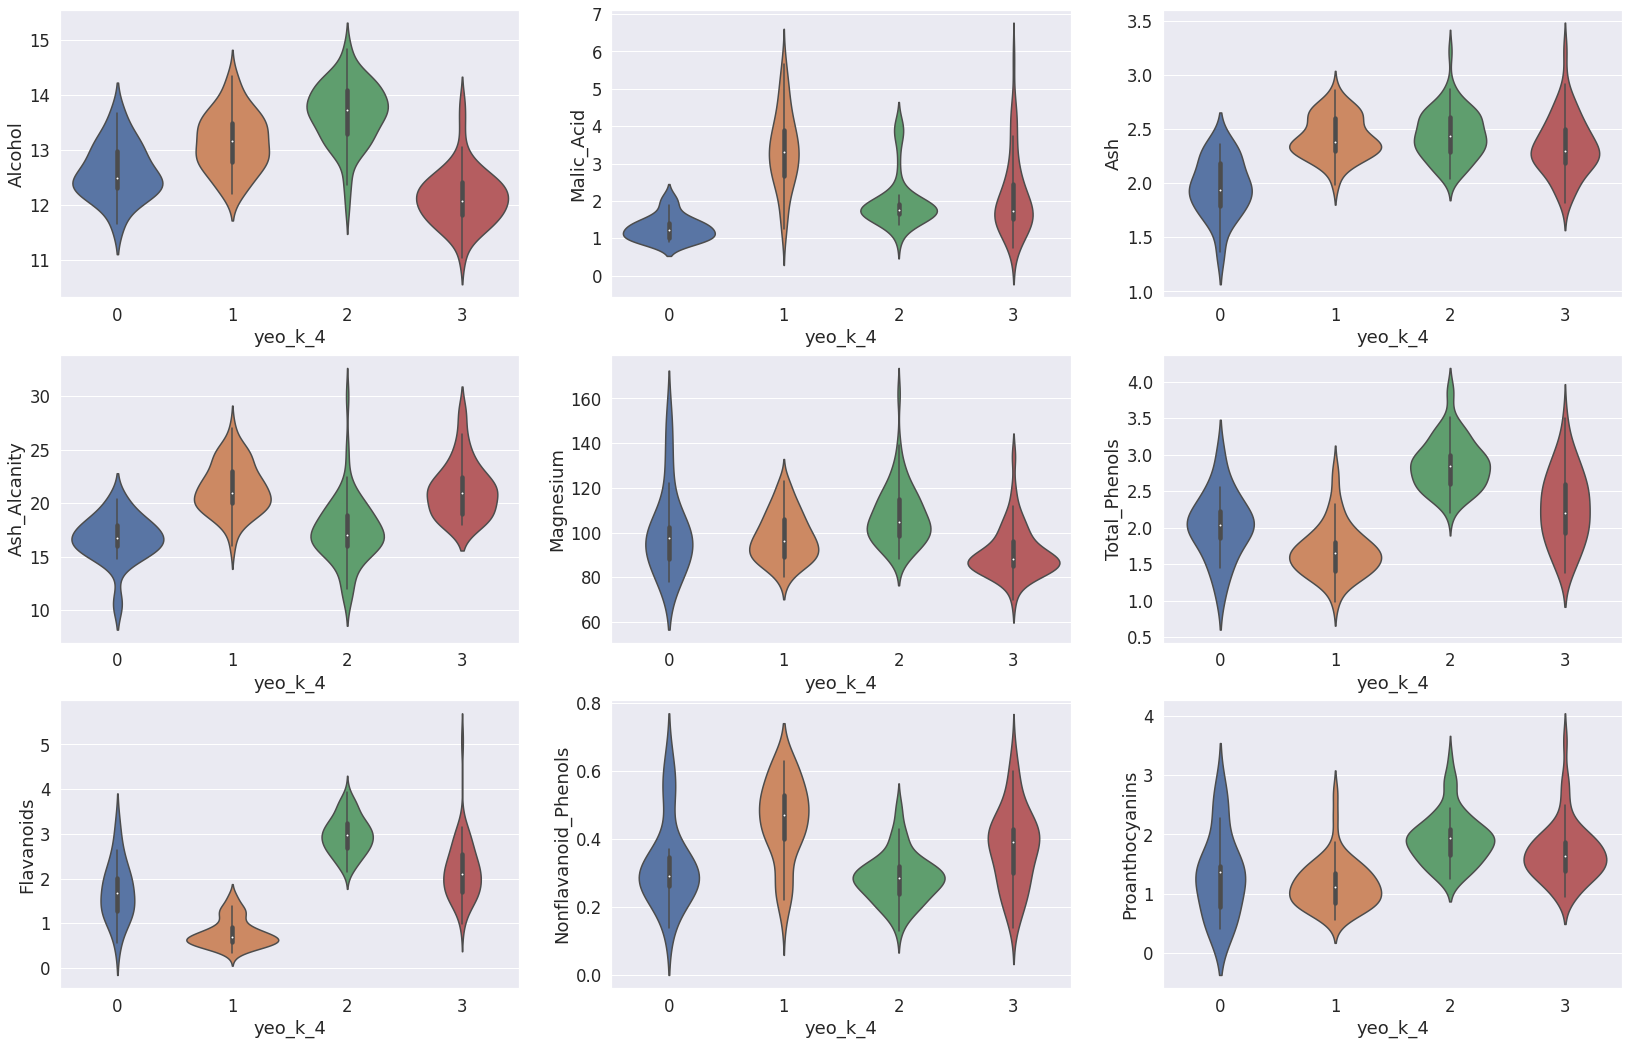

In [48]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(28,18))
ax = ax.ravel()
for pos, col in enumerate(COLUMNS):
  # use violinplot to see each cluster's variable is distrubuted
  sns.violinplot(x='yeo_k_4', y=col, data=wp, ax=ax[pos])

In [49]:
features = wp[COLUMNS]
umap_2d = umap.UMAP(n_components=2, init='random', random_state=SEED)
proj_2d = umap_2d.fit_transform(features)

In [50]:
fig = go.Figure(data=go.Scatter(x=proj_2d[:,0], y=proj_2d[:,1],
                 mode="markers",
                 marker=dict(color=color_change_2d(wp,'yeo_k_4',4),size=5,showscale=False)))
fig.update_layout(height=500,title_text="Visualizing 2D Clusters K=4", showlegend=False)
fig.show()

###K=3

In [51]:
model = KMeans(n_clusters=3,random_state=SEED)
model.fit(yeodf)
model.cluster_centers_.round(4)

array([[-0.9247, -0.4965, -0.4845,  0.1732, -0.5907, -0.0346,  0.0645,
        -0.0333,  0.0644, -1.0071,  0.4727,  0.263 , -0.8307],
       [ 0.837 , -0.1828,  0.3641, -0.6203,  0.622 ,  0.8832,  0.9685,
        -0.5424,  0.6008,  0.3171,  0.4778,  0.7849,  1.0766],
       [ 0.1401,  0.8289,  0.1622,  0.5264, -0.0146, -1.0106, -1.2342,
         0.6877, -0.7956,  0.8615, -1.1514, -1.2595, -0.2613]])

In [52]:
wp.groupby('yeo_k_3')[COLUMNS].mean()

Alcohol  Malic_Acid  ...  Nonflavanoid_Phenols  Proanthocyanins
yeo_k_3                         ...                                       
0        12.250312    1.901875  ...              0.357500         1.626719
1        13.676774    1.997903  ...              0.292097         1.922097
2        13.117885    3.274615  ...              0.450385         1.151923

[3 rows x 9 columns]

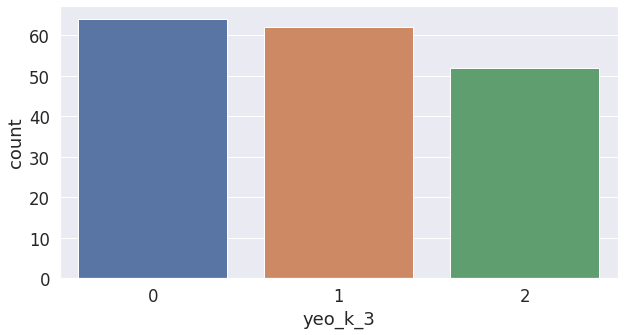

In [53]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='yeo_k_3', data=wp);

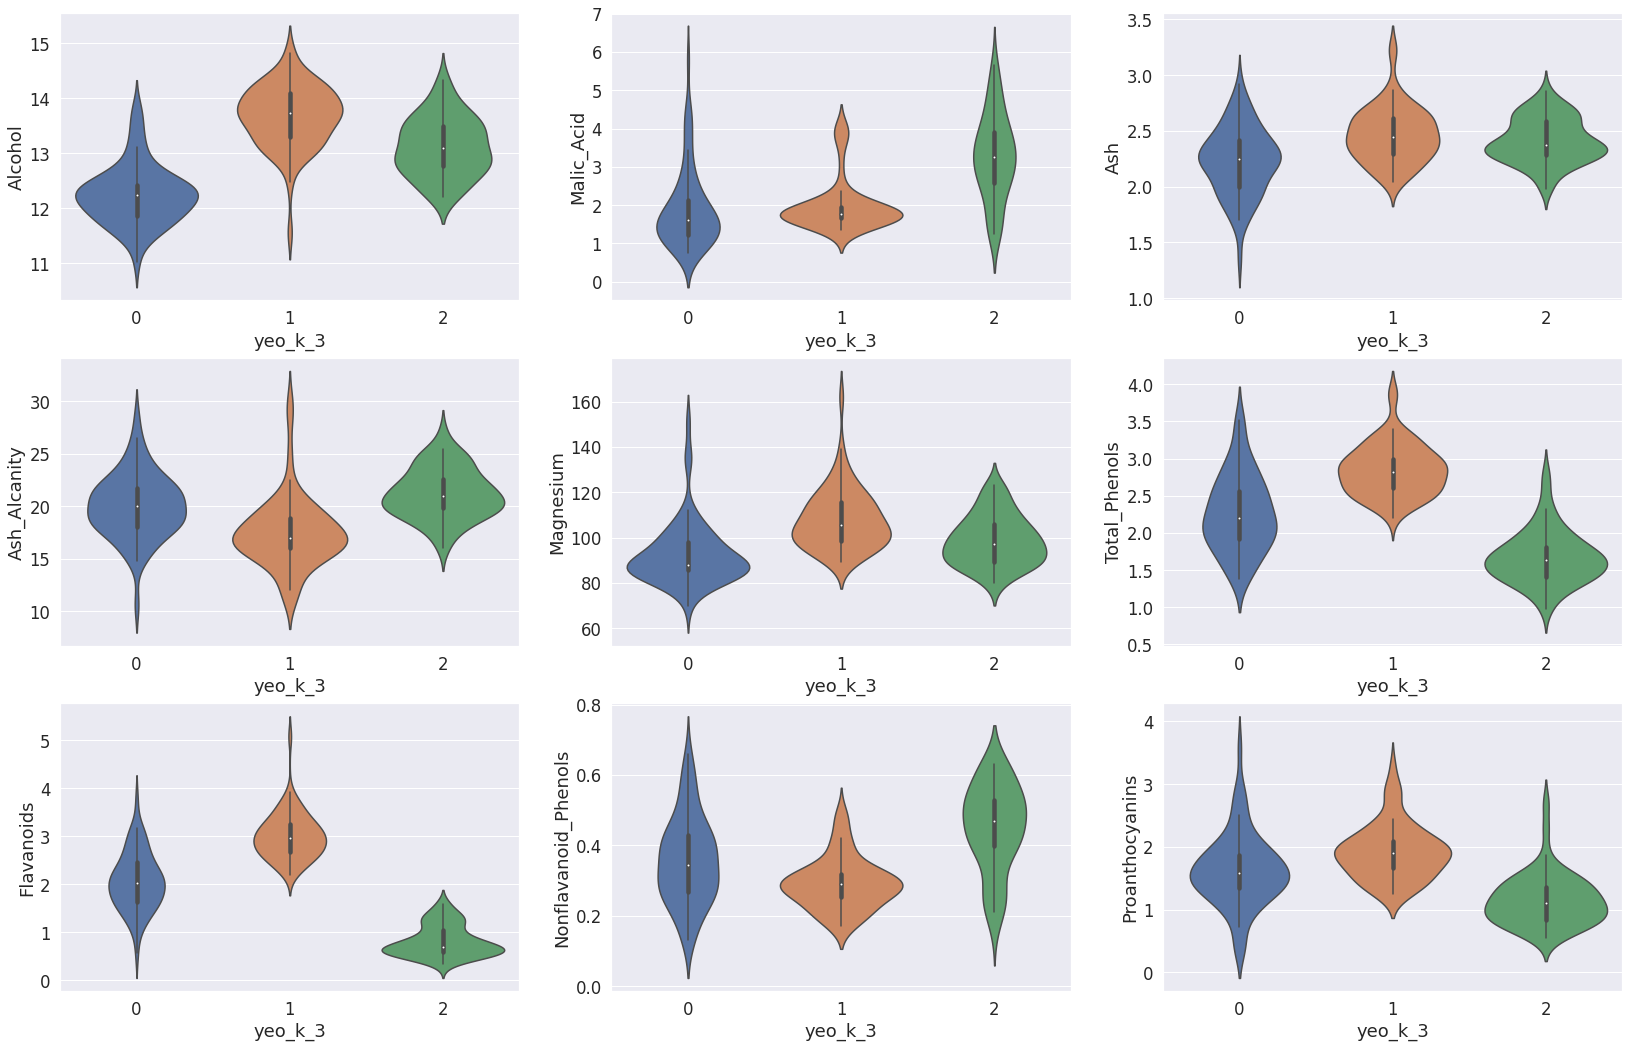

In [54]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(28,18))
ax = ax.ravel()
for pos, col in enumerate(COLUMNS):
  # use violinplot to see each cluster's variable is distrubuted
  sns.violinplot(x='yeo_k_3', y=col, data=wp, ax=ax[pos])

In [55]:
features = wp[COLUMNS]
umap_2d = umap.UMAP(n_components=2, init='random', random_state=SEED)
proj_2d = umap_2d.fit_transform(features)

In [56]:
fig = go.Figure(data=go.Scatter(x=proj_2d[:,0], y=proj_2d[:,1],
                 mode="markers",
                 marker=dict(color=color_change_2d(wp,'yeo_k_3',3),size=5,showscale=False)))
fig.update_layout(height=500,title_text="Visualizing 2D Clusters K=3", showlegend=False)
fig.show()

##Visualizing Clusters
- ทำการ visualizing clusters แบบ 3D ไปด้วยเพื่อให้เห็นภาพช่วง custer ที่แยกกลุ่มกันอย่างชัดเจน โดยจะใช้วิธี **Umap** ในการ **Visualizing Clusters 3D**

In [57]:
#Color Mapping
def color_change_3d(data,col,k):
  if k==5:
    map = {0:'blue',1:'orange',2:'green',3:'red',4:'purple'}
  elif k==4:
    map = {0:'blue',1:'orange',2:'green',3:'red'}
  elif k==3:
    map = {0:'blue',1:'orange',2:'green'}
  return data[col].map(map)

###K=5

In [58]:
features = wp[COLUMNS]
umap_3d = umap.UMAP(n_components=3, init='random', random_state=SEED)
proj_3d = umap_3d.fit_transform(features)

In [59]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Box-Cox", "Yeo-Johnson"),
    specs=[[{"type": "scatter3d"}, {"type": "scatter3d"}]])

#Box-Cox
fig.add_trace(go.Scatter3d(x=proj_3d[:,0], y=proj_3d[:,1],
                           z=proj_3d[:,2], mode="markers",
                           marker=dict(color=color_change_3d(wp,'box_k_5',5),size=5,showscale=False)),
                           row=1, col=1)
#Yeo-Johnson
fig.add_trace(go.Scatter3d(x=proj_3d[:,0], y=proj_3d[:,1],
                           z=proj_3d[:,2], mode="markers",
                           marker=dict(color=color_change_3d(wp,'yeo_k_5',5),size=5,showscale=False)),
                           row=1, col=2)
fig.update_layout(height=700,title_text="Visualizing 3D Clusters K=5", showlegend=False)
fig.show()

###K=4

In [60]:
features = wp[COLUMNS]
umap_3d = umap.UMAP(n_components=3, init='random', random_state=SEED)
proj_3d = umap_3d.fit_transform(features)

In [61]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Box-Cox", "Yeo-Johnson"),
    specs=[[{"type": "scatter3d"}, {"type": "scatter3d"}]])

#Box-Cox
fig.add_trace(go.Scatter3d(x=proj_3d[:,0], y=proj_3d[:,1],
                           z=proj_3d[:,2], mode="markers",
                           marker=dict(color=color_change_3d(wp,'box_k_4',4),size=5,showscale=False)),
                           row=1, col=1)
#Yeo-Johnson
fig.add_trace(go.Scatter3d(x=proj_3d[:,0], y=proj_3d[:,1],
                           z=proj_3d[:,2], mode="markers",
                           marker=dict(color=color_change_3d(wp,'yeo_k_4',4),size=5,showscale=False)),
                           row=1, col=2)
fig.update_layout(height=700,title_text="Visualizing 3D Clusters K=4", showlegend=False)
fig.show()

###K=3

In [62]:
features = wp[COLUMNS]
umap_3d = umap.UMAP(n_components=3, init='random', random_state=SEED)
proj_3d = umap_3d.fit_transform(features)

In [63]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Box-Cox", "Yeo-Johnson"),
    specs=[[{"type": "scatter3d"}, {"type": "scatter3d"}]])

#Box-Cox
fig.add_trace(go.Scatter3d(x=proj_3d[:,0], y=proj_3d[:,1],
                           z=proj_3d[:,2], mode="markers",
                           marker=dict(color=color_change_3d(wp,'box_k_3',3),size=5,showscale=False)),
                           row=1, col=1)
#Yeo-Johnson
fig.add_trace(go.Scatter3d(x=proj_3d[:,0], y=proj_3d[:,1],
                           z=proj_3d[:,2], mode="markers",
                           marker=dict(color=color_change_3d(wp,'yeo_k_3',3),size=5,showscale=False)),
                           row=1, col=2)
fig.update_layout(height=700,title_text="Visualizing 3D Clusters K=3", showlegend=False)
fig.show()

##Conclusion k=3 และ k=4

สรุปแล้วจะได้ **Box-Cox** จาก **Violin Plot** โดยสามารถจัด k ได้หลายกลุ่มแต่เราจะนำ k=3 และ k=4 มาใช้ k=3 จะสามารถจัดกลุ่มได้ชัดเจนที่สุด แต่ k=4 สามารถจัดกลุ่มเป้าหมายได้หลากหลายแต่มีความเสถียรมากกว่า ทำให้ทราบว่า
> สินค้าของเราสามารถจัดกลุ่มรสชาติสินค้าจากส่วนผสมและปริมาณที่ต่างกัน
ซึ่งเราสามารถนำข้อมูลไวน์ที่จัดกลุ่ม นำมาประยุกต์ใช้เพื่อสามารถเลือกสินค้าให้ตรงตามกลุ่มเป้าหมาย โดยกลุ่มเป้าหมายของเราแบ่งออกมาได้ 4 กลุ่ม
- กลุ่มคนชอบรสชาติสไปซ์เข้มข้น (custer 0)
- กลุ่มคนชอบรสชาติเปรี้ยวฝาด (custer 1)
- กลุ่มคนชอบรสชาติหวานครีมมี่ (custer 2)
- กลุ่มคนชอบรสชาติเปรี้ยวหอมอ่อนๆ (custer 3)

ซึ่งข้อมูลการจัดกลุ่มแบบ **k=4** จะสามารถนำมาประยุกต์ใช้ทางธุรกิจให้เกิดประโยชน์ได้มากที่สุด ถึงแม้ว่า k=3 จะถูกแนะนำมากว่าในช่วง evaluate ด้วยคะแนนที่สูง แต่ทางด้านการนำมาใช้ประโยชน์ทางธุรกิจ k=3 อาจจะมีประโยชน์น้อยกว่า k=4

#Pipeline

Preprocessing
>- check data type
- check null

EDA and Statistical Analysis
>- check data stats
- compare each data

Feature Engineering
>ทำข้อมูลให้ Normalized
- Scale
- Box-Cox
- Yeo-Johnson

KMean Model
>- Set Parameter
- Modelling
 - Box-Cox Elbow & Silhouette Score
 - Yeo-Johnson Elbow & Silhouette Score
- DataFrame

Evaluate
>- Elbow & Silhouette Score
 - Box-Cox
 - Yeo-Johnson

Interpretation
>- Box-Cox
 - K=5
 - K=4
 - K=3
>- Yeo-Johnson
 - K=5
 - K=4
 - K=3
>- Visualizing Clusters
 - K=5
 - K=4
 - K=3
- Conclusion

In [64]:
class Pipeline:
    def __init__(self):
        self.transformer = PowerTransformer(method='box-cox')

    def feature_engineering(self,data,method):
        if method == 'train':
          box = self.transformer.fit_transform(data)
        elif method == 'predict':
          box = self.transformer.transform(data)
        return box

    def build(self,data,method='train'):
        return self.feature_engineering(data,method)

In [65]:
df_test = pd.read_csv(url)
pipeline = Pipeline()

In [66]:
wo = pipeline.build(data=df_test,method='train')

In [67]:
model = KMeans(n_clusters=4,random_state=SEED)
model.fit(wo)

KMeans(n_clusters=4, random_state=4)

In [68]:
!pip install gradio -q

     |████████████████████████████████| 979 kB 34.8 MB/s 
     |████████████████████████████████| 206 kB 60.2 MB/s 
     |████████████████████████████████| 2.0 MB 34.3 MB/s 
     |████████████████████████████████| 961 kB 37.6 MB/s 
     |████████████████████████████████| 63 kB 2.6 MB/s 
     |████████████████████████████████| 3.6 MB 56.6 MB/s 


In [69]:
import gradio as gr

#Deployment

In [70]:
def predict_wine(Alcohol,
                 Malic_Acid,
                 Ash,
                 Ash_Alcanity,
                 Magnesium,
                 Total_Phenols,
                 Flavanoids,
                 Nonflavanoid_Phenols,
                 Proanthocyanins
                #  Color_Intensity,
                #  Hue,
                #  idk,
                #  Proline
                 ):
  
    input = pd.DataFrame({
        'Alcohol': Alcohol,
        'Malic_Acid': Malic_Acid,
        'Ash': Ash,
        'Ash_Alcanity': Ash_Alcanity,
        'Magnesium': Magnesium,
        'Total_Phenols': Total_Phenols,
        'Flavanoids': Flavanoids,
        'Nonflavanoid_Phenols': Nonflavanoid_Phenols,
        'Proanthocyanins': Proanthocyanins,
        'Color_Intensity': 5,
        'Hue': 1,
        'OD280': 3,
        'Proline': 500
    }, index=[0])

    wr = pipeline.build(data=input,method='predict')
    groups = ['รสชาติสไปซ์เข้มข้น', 'รสชาติเปรี้ยวฝาด', 'รสชาติหวานครีมมี่', 'รสชาติเปรี้ยวหอมอ่อนๆ']
    return  groups[model.predict(wr)[0]]


Alcohol = gr.inputs.Slider(minimum=1, maximum=20,
                           step=0.5, default=1, label='Alcohol')
Malic_Acid = gr.inputs.Slider(
    minimum=0.1, maximum=10, step=0.1, default=0.1, label='Malic_Acid')
Ash = gr.inputs.Slider(minimum=0.1, maximum=5, step=0.1, default=0.1, label='Ash')
Ash_Alcanity = gr.inputs.Slider(
    minimum=1, maximum=40, step=1, default=1, label='Ash_Alcanity')
Magnesium = gr.inputs.Slider(
    minimum=50, maximum=200, step=1, default=50, label='Magnesium')
Total_Phenols = gr.inputs.Slider(
    minimum=0.1, maximum=5, step=0.1, default=0.1, label='Total_Phenols')
Flavanoids = gr.inputs.Slider(
    minimum=0.1, maximum=10, step=0.1, default=0.1, label='Flavanoids')
Nonflavanoid_Phenols = gr.inputs.Slider(
    minimum=0.1, maximum=1, step=0.1, default=0.1, label='Nonflavanoid_Phenols')
Proanthocyanins = gr.inputs.Slider(
    minimum=0.1, maximum=5, step=0.1, default=0.1, label='Proanthocyanins')

#ใส่เพื่อเป็นทางเลือกในการเลือก
# Color_Intensity = gr.inputs.Slider(
#     minimum=1, maximum=100, step=1, default=1, label='Color_Intensity')
# Hue = gr.inputs.Slider(
#     minimum=1, maximum=100, step=1, default=1, label='Hue')
# idk = gr.inputs.Slider(
#     minimum=1, maximum=100, step=1, default=1, label='OD280')
# Proline = gr.inputs.Slider(
#     minimum=1, maximum=2000, step=10, default=1, label='Proline')

iface = gr.Interface(
    predict_wine,
    outputs=[gr.outputs.Textbox(type="auto", label='Group')],
    inputs=[Alcohol,
            Malic_Acid,
            Ash,
            Ash_Alcanity,
            Magnesium,
            Total_Phenols,
            Flavanoids,
            Nonflavanoid_Phenols,
            Proanthocyanins
            # Color_Intensity,
            # Hue,
            # idk,
            # Proline
            ])
            
iface.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://28158.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


KeyboardInterrupt: ignored

#References

https://github.com/king-glitch/cs-434

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html

https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

https://colab.research.google.com/drive/1ZpD7sS9ay3QO42x9uNxPRTpf0x_2ll_X?usp=sharing

https://plotly.com/python/line-and-scatter/

https://plotly.com/python/3d-scatter-plots/

https://plotly.com/python/subplots/


#Members
- **1620707339** นพชัย สมทรง 327A
- **1620704666** ภานุพงค์ ภาคธารี 327A